# Lab 6

## To sample from a mixture of Gaussians

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return(U @ A.T + m)

# Define three means
#
Means = np.array([[0, 3], [3, 0], [4,4]])
# Define three covariance matrices ensuring
# they are positive definite
#
from sklearn.datasets import make_spd_matrix
CovMatrices = np.zeros((3,2,2))
for j in range(3):
    CovMatrices[j,:,:] = make_spd_matrix(2)

# Priors
#
w = np.random.rand(3)
w = w / np.sum(w)
# How many data in each component (1000 in total)
#
nData = np.floor(w * 1000).astype(int)
# Draw samples from each component
#
X0 = genGaussianSamples(nData[0], Means[0,:], CovMatrices[0,:,:])
X1 = genGaussianSamples(nData[1], Means[1,:], CovMatrices[1,:,:])
X2 = genGaussianSamples(nData[2], Means[2,:], CovMatrices[2,:,:])
# Append into an array for the data we need
#
X = np.append(np.append(X0, X1, axis=0), X2, axis=0)

## Non-Negative Matrix Factorization

(40, 10)
1.8061764270718252


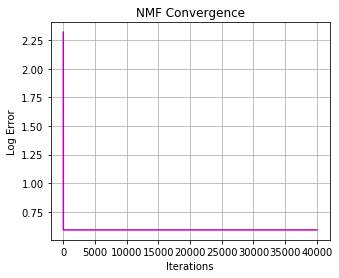

In [6]:
r = 6

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Specify the rank
#

# Construct a low rank matrix
#
Wtrue = np.random.rand(40,5)
Htrue = np.random.rand(5,10)
V0 = Wtrue @ Htrue
print(V0.shape)

# Dimensions of data
m, n = V0.shape

# Normalise columnwise
V = np.zeros((m, n))
for i in range(n):
    V[:,i] = V0[:,i] / np.max(V0[:,i])
    
# Initialize
#
W = np.random.rand(m, r)
H = np.random.rand(r, n)
MaxIter = 40000
f = np.zeros((MaxIter,1))

# Initial error
f[0] = np.linalg.norm(V - W @ H, ord='fro');
for iter in range(MaxIter-1):
    # Update W
    W = W * (np.true_divide(V, W @ H) @ H.T)
    W = np.divide(W, np.sum(W, axis=0))

    # Update H
    H = H * (W.T @ np.true_divide(V, W @ H))
    
    # Measure Error
    f[iter+1] = np.linalg.norm(V - W @ H, ord='fro')
    
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('NMF Convergence')
ax.plot(np.arange(MaxIter), np.log(f), c='m')
ax.set_xlabel('Iterations')
ax.set_ylabel('Log Error')
ax.grid(True)
print(np.linalg.norm(V - W @ H, ord='fro'))

## Test NMF with Scikit-Learn

1.2582386897734852
1.2559524819672492
0.5547748203082717
0.545427136944242
2.8935187579293142e-15
0.002332860834534227
2.626094047223331e-15
0.0016994304788679347
3.0349233860234356e-15
0.002893932529478591
2.17895632061591e-15
0.001789074785313642
2.4035431057470038e-15
0.0011140691384301396
2.1612064800422318e-15
0.000390832543796753


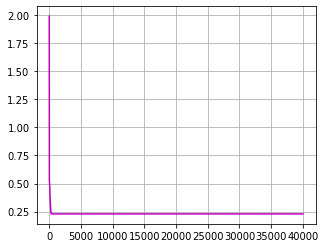

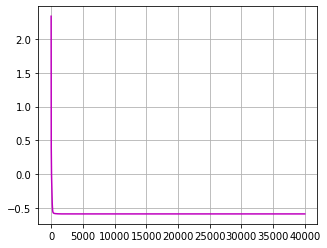

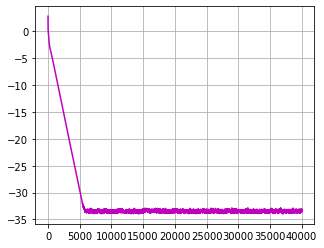

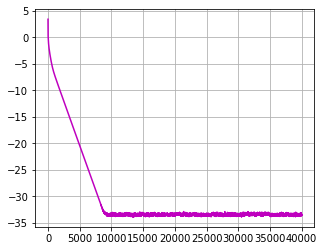

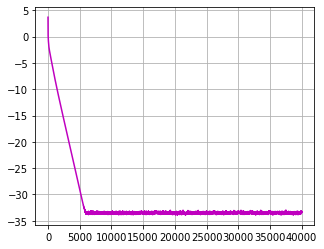

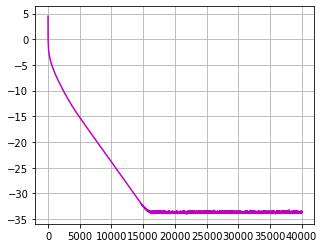

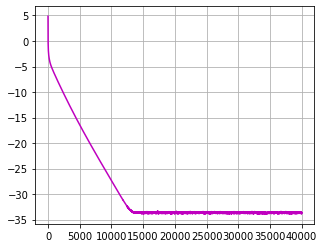

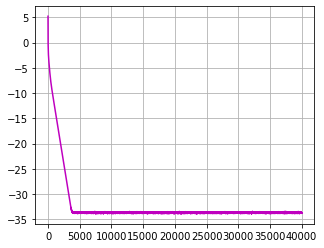

In [10]:
from sklearn.decomposition import NMF

rankings = [2, 4, 6, 8, 10, 20, 30, 40] 
errors = []
errors_manual = []
for r in rankings:
    nmf_clf = NMF(n_components=nts=r, init='random', max_iter=40000)

    w_sk = nmf_clf.fit_transform(V)
    pred_V = nmf_clf.inverse_transform(w_sk)
    errors.append(np.linalg.norm(pred_V - V, ord='fro'))
    
    W_, H_ = nmf_factor(V, r=r)
    errors_manual.append(np.linalg.norm(V - W @ H, ord='fro'))
    print(np.linalg.norm(pred_V - V, ord='fro'))


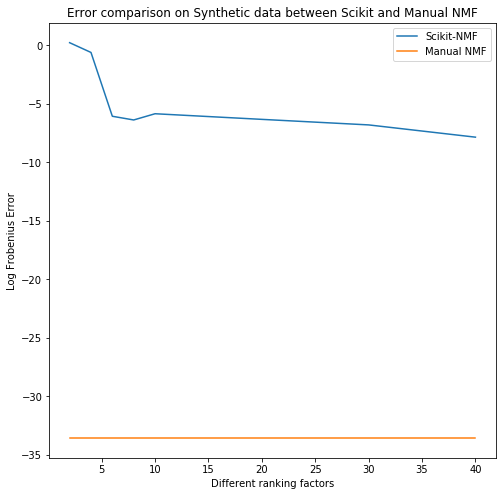

In [14]:
plt.figure(figsize=(8, 8))
plt.plot(rankings, np.log(errors))
plt.plot(rankings, np.log(errors_manual))
plt.legend(['Scikit-NMF', 'Manual NMF'])
plt.xlabel('Different ranking factors')
plt.ylabel('Log Frobenius Error')
plt.title('Error comparison on Synthetic data between Scikit and Manual NMF')
plt.show()

## Equities Dataset 

In [15]:
def nmf_factor(V, r=6, max_iters=40000):
    # Dimensions of data
    #
    m, n = V.shape

    # Normalise columnwise
    #
    #V = np.zeros((m, n))
    #for i in range(n):
    #    V[:,i] = V0[:,i] / np.max(V0[:,i])

    # Initialize
    #
    W = np.random.rand(m, r)
    H = np.random.rand(r, n)
    MaxIter = max_iters
    f = np.zeros((MaxIter,1))

    # Initial error
    f[0] = np.linalg.norm(V - W @ H, ord='fro');
    for iter in range(MaxIter-1):
        # Update W
        #
        W = W * (np.true_divide(V, W @ H) @ H.T)
        W = np.divide(W, np.sum(W, axis=0)) ## TODO IS THE DIVISION OK, check with manual??
        # break
        # Update H
        #
        H = H * (W.T @ np.true_divide(V, W @ H))

        # Measure Error
        #
        f[iter+1] = np.linalg.norm(V - W @ H, ord='fro')


    fig, ax = plt.subplots(figsize=(5,4))
    ax.set_title('Log Error')
    ax.set_ylabel('Log Error')
    ax.set_xlabel('Iterations')
    ax.plot(np.arange(MaxIter), np.log(f), c='m')
    ax.grid(True)
    print(np.linalg.norm(V - W @ H, ord='fro'))
    
    return W, H

In [9]:
import pandas as pd

data = pd.read_excel('Equities.xlsx')

In [10]:
columns = data.columns.to_list()

In [11]:
data.drop(['Name'], axis=1, inplace=True)

data_np = data.values

In [12]:
data_np.shape

(1966, 96)

In [13]:
# Train Test Split 
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data_np, test_size=0.5, random_state=42)

23512.261175611387


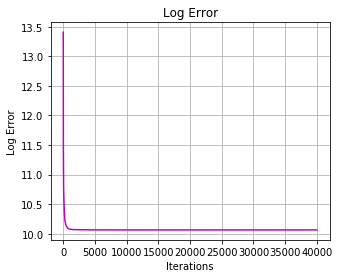

In [16]:
X_train.shape
W, H = nmf_factor(X_train, r=10)

In [17]:
estimated_Values = W @ H

In [19]:
# Real Data Correlation 
data.corr()['FTSE100'].sort_values()[::-1][:10]

FTSE100          1.000000
PRUDENTIAL       0.914483
FERGUSON         0.901689
ASHTEAD GROUP    0.894129
SMITHS GROUP     0.892992
BAE SYSTEMS      0.889357
SCHRODERS        0.881734
3I GROUP         0.881438
MONDI            0.879007
ICTL.HTLS.GP.    0.875113
Name: FTSE100, dtype: float64

In [30]:
data_np = data.values

# pd Dataframe Data
train_data = data.iloc[:983, :]
test_data = data.iloc[983:, :]


In [21]:
est_data = pd.DataFrame(data=estimated_Values, index=None, columns=columns[1:])

In [23]:
est_data.corr()['FTSE100'].sort_values()[::-1]

FTSE100               1.000000
SMITHS GROUP          0.921677
PRUDENTIAL            0.905423
FERGUSON              0.899800
BAE SYSTEMS           0.898169
                        ...   
FRESNILLO            -0.224665
STANDARD CHARTERED   -0.455851
TESCO                -0.467459
PEARSON              -0.491029
CENTRICA             -0.541395
Name: FTSE100, Length: 96, dtype: float64

In [25]:
# Correlation to FTSE100 after matrix estimation
est_data.corr()['FTSE100'].sort_values()[::-1]
# est_data.corr()['FTSE100'].sort_values()[::-1]
SELECT_FACTOR = 'SMITHS GROUP'

In [26]:
# Invest in the first two highly ranking stocks
factors = est_data[['FTSE100', SELECT_FACTOR]]

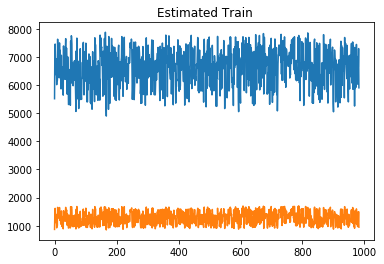

In [27]:
plt.figure()
plt.title('Estimated Train ')
plt.plot(np.arange(factors.shape[0]), factors['FTSE100'])
plt.plot(np.arange(factors.shape[0]), factors[SELECT_FACTOR])
plt.show()

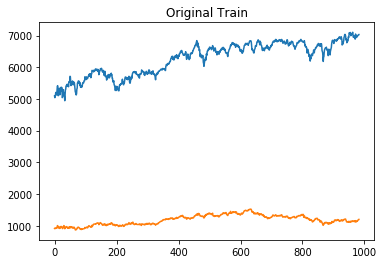

In [33]:
plt.figure()
plt.title('Original Train')
plt.plot(np.arange(factors.shape[0]), train_data['FTSE100'])
plt.plot(np.arange(factors.shape[0]), train_data[SELECT_FACTOR])
plt.show()

In [34]:
# Invest money
amount = 100000

original_data_factors = train_data[['FTSE100', SELECT_FACTOR]]


In [35]:
factor_1 = factors['FTSE100'].values
factor_2 = factors[SELECT_FACTOR].values

factor_1_test = test_data['FTSE100'].values
factor_2_test = test_data[SELECT_FACTOR].values

array([5511.88679577, 7300.89965149, 7454.17373239, 6859.28122043,
       6371.40622897, 6387.32995852, 6552.39951043, 6010.44894124,
       6936.03762055, 6161.02938604, 7626.19783304, 6660.87898036,
       7197.04793906, 6841.89866578, 6872.92634619, 6254.23244208,
       7494.37095828, 6341.4206101 , 7232.13650584, 6951.44441573,
       6165.67135386, 5860.47730005, 7054.5638132 , 6415.34027219,
       6021.91505623, 5880.1876792 , 5973.34200719, 6652.27753945,
       5639.72389833, 7386.28386406, 6393.50183994, 6451.95368014,
       6583.17917855, 6939.58566245, 6198.252385  , 7314.5983042 ,
       7646.12705038, 6668.39562753, 7268.01852981, 7304.50855185,
       6952.51834435, 5673.21574005, 6977.14972166, 6996.32027211,
       6368.21667847, 5306.46071673, 5318.07661128, 5756.93197903,
       6547.02940152, 6544.86160954, 6361.58750342, 5278.95723983,
       7557.4228758 , 6338.54287993, 7748.6171209 , 7725.45221973,
       7445.35258922, 6059.37805978, 6194.91732693, 6776.35409

In [39]:
# Compute cummulative returns
def compute_com_returns(values):
    return (values[-1] / values[0]) - 1

In [38]:
# Predicted
print(compute_com_returns(factor_1)*100, ' %')
print(compute_com_returns(factor_2)*100, ' %')

# Ground Truth cum Returns
print('Ground Truth')
print(compute_com_returns(factor_1_test)*100, ' %')
print(compute_com_returns(factor_2_test)*100, ' %')


7.035580608520631  %
9.230487180494107  %
Ground Truth
1.8094715922745808  %
19.90779547359598  %


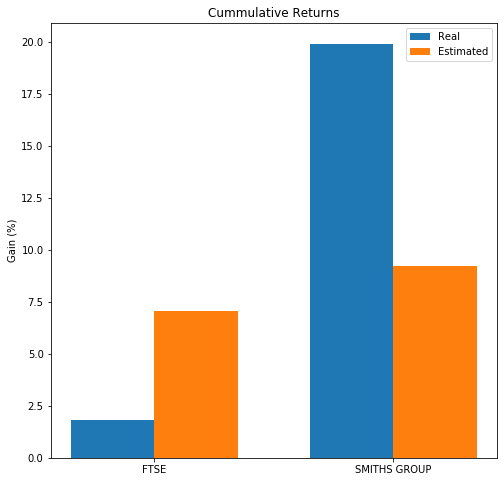

In [64]:
# Rank 10 predictions SMITHS GROUP and FTSE
fig, ax = plt.subplots(figsize=(8, 8))
ind = np.arange(2)    # the x locations for the groups
width = 0.35         # the width of the bars
ax.set_title('Cummulative Returns')
ax.set_ylabel('Gain (%)')

p1 = ax.bar(ind, [1.8, 19.9], width)
p2 = ax.bar(ind+width, [7.03, 9.23], width)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('FTSE', 'SMITHS GROUP'))
ax.legend((p1[0], p2[0]), ('Real', 'Estimated'))

plt.show()

array([0, 1])

In [77]:
# Randomly chosen Factors
import random
rm_factor_name_1, rm_factor_name_2 = random.choices(columns[1:], k=2)

factors = est_data[[rm_factor_name_1, rm_factor_name_2]]

factor_1 = factors[rm_factor_name_1].values
factor_2 = factors[rm_factor_name_2].values

factor_1_test = test_data[rm_factor_name_1].values
factor_2_test = test_data[rm_factor_name_2].values

# Predicted
print('Predicted')
print(compute_com_returns(factor_1)*100, ' %')
print(compute_com_returns(factor_2)*100, ' %')

# Ground Truth cum Returns
print('Ground Truth')
print(compute_com_returns(factor_1_test)*100, ' %')
print(compute_com_returns(factor_2_test)*100, ' %')

Predicted
15.729930417849625  %
17.88226308891039  %
Ground Truth
-19.543726235741442  %
-6.673076923076926  %


In [78]:
rm_factor_name_1, rm_factor_name_2

('AVIVA', 'WHITBREAD')

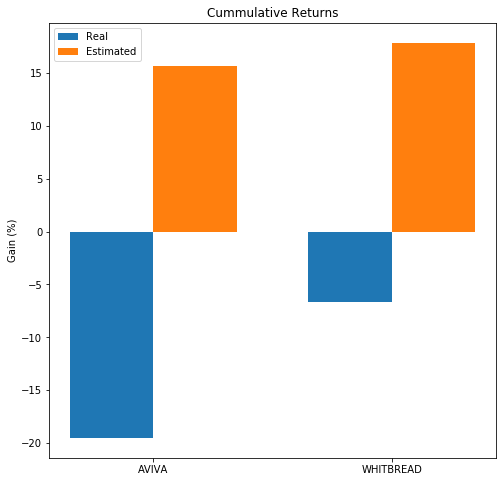

In [79]:
# RAndom factors Estimation
# 'NATIONAL GRID', 'ANGLO AMERICAN'
fig, ax = plt.subplots(figsize=(8, 8))
ind = np.arange(2)    # the x locations for the groups
width = 0.35         # the width of the bars
ax.set_title('Cummulative Returns')
ax.set_ylabel('Gain (%)')

p1 = ax.bar(ind, [-19.54,   -6.67 ], width)
p2 = ax.bar(ind+width, [15.72, 17.88], width)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((rm_factor_name_1, rm_factor_name_2))
ax.legend((p1[0], p2[0]), ('Real', 'Estimated'))

plt.show()


## Approximate Bayes Data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return(U @ A.T + m)

NClasses = 3
# Priors1
#
w = np.random.rand(NClasses)
w = w / np.sum(w)
N = 1000 # total data (Training = Test)
NPrior = np.floor(w * N).astype(int)
Scale = 10
Means = Scale*np.random.rand(NClasses, 2)
from sklearn.datasets import make_spd_matrix
CovMatrices = np.zeros((NClasses,2,2))
for j in range(NClasses):
    CovMatrices[j,:,:] = make_spd_matrix(2)

AllData_train = list()
    
for j in range(NClasses):
    AllData_train.append(genGaussianSamples(NPrior[j], Means[j,:], CovMatrices[j,:,:]))

X_train = AllData_train[0]
y_train = np.ones((NPrior[0], 1))

for j in range(NClasses-1):
    Xj = genGaussianSamples(NPrior[j+1], Means[j+1,:], CovMatrices[j+1,:,:])
    X_train = np.append(X_train, Xj, axis=0)
    yj = (j+2)*np.ones((NPrior[j+1], 1))
    y_train = np.append(y_train, yj)

AllData_test = list()
for j in range(NClasses):
    AllData_test.append(genGaussianSamples(NPrior[j], Means[j,:], CovMatrices[j,:,:]))
    
X_test = AllData_test[0]
y_test = np.ones((NPrior[0], 1))

for j in range(NClasses-1):
    Xj = genGaussianSamples(NPrior[j+1], Means[j+1,:], CovMatrices[j+1,:,:])
    X_test = np.append(X_test, Xj, axis=0)
    yj = (j+2)*np.ones((NPrior[j+1], 1))
    y_test = np.append(y_test, yj)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
plt.subplots_adjust(wspace=0.3)
for j in range(NClasses):
    Xplt = AllData_train[j]
    ax[0].scatter(Xplt[:,0], Xplt[:,1], s=3)
    
ax[0].grid(True)
ax[0].set_title("Training Data Distributions")
ax[1].plot(y_train)
ax[1].set_title("Training Targets")

for j in range(NClasses):
    Xplt = AllData_test[j]
    
ax[2].scatter(Xplt[:,0], Xplt[:,1], s=3)
ax[2].grid(True)
ax[2].set_title("Test Data Distributions")

## Approximating Bayes Posterior Probability: MLP-Training

In [ ]:
# Encoding the output
#
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot_train = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
# Trainign a neural network
#
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_onehot_train)
# Predictions, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred_train = clf.predict(X_train)

print(accuracy_score(y_onehot_train, y_pred_train))

N_train = X_train.shape[0]
predicted_class_train = np.zeros((N_train,1))
for j in range(N_train):
    predicted_class_train[j] = (1+np.argmax(y_pred_train[j,:])).astype(int)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_train, predicted_class_train))

(1966, 96)